# Final EV Adoption Analysis Notebook

## Introducton

Welcome to the "Electric Vehicle Adoption Analysis" project! In this comprehensive study, we delve into various facets of electric vehicle (EV) adoption in California, aiming to gain valuable insights into current trends and patterns. The project is structured around five key questions, each exploring different aspects of EV adoption.

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scripts.geo import plot_geospatial_data
from scripts.corr_matrix import plot_correlation_matrix
from scripts.scatter import scatter_plot
from scripts.pie_chart import plot_pie_chart
from scripts.bar_scatter import plot_bar_scatter
from scripts.train import train_model

In [2]:
RELATIVE_PATH = "/Users/yashowardhanshinde/Desktop/ECE 143/ECE143_EV_Adoption_Analysis/"

### Q1 Electric Vehicle Adoption Patterns

- Question: How does the distribution of electric vehicles vary across different ZIP codes?
- Patterns to Explore: Identify ZIP codes with high and low electric vehicle adoption rates. Investigate if certain regions show a higher preference for electric cars.

In [3]:
df_1 = pd.read_csv(f'{RELATIVE_PATH}data/final_ev_analysis.csv', index_col='Unnamed: 0')

file_path = f'{RELATIVE_PATH}data/california_zip_codes_geo_updated/ev_final_analysis_geo.shp'
zip_codes = df_1['ZIP'].to_list()
ev_adoption = df_1['EV_perc'].to_list()
data_to_plot = {str(k):v for k, v in zip(zip_codes, ev_adoption)}
join_col_name = 'ZIP'
value_name = 'EV Percentage'
output_file_name = f'{RELATIVE_PATH}results/california_cars.html'
plot_geospatial_data(file_path, data_to_plot, join_col_name, value_name, output_file_name)

Observed Trends:
1. Rate of EV Adoption is quite low compared to the traditional gasoline vehicles in general.
2. It can be observed that there are 3 major clusters where the EV Adoption rates are higher compared to others.
3. The 3 major clusters are San Fransico, Los Angeles and San Diego regions.
4. On the first look this might seem quite obvious that these regions have the highest adotion rates because they are densely populated urban centers with a higher concentration of charging infrastructure, environmental awareness, and high income residents.

### Q2 Demographic Correlations

- Question: Are there correlations between demographic characteristics and electric vehicle adoption?
- Patterns to Explore:  Analyze the relationship between ethnicity, education level, and the percentage of electric vehicles. Explore if areas with higher income levels tend to have more electric vehicles.


Features Considered:
- Ethnicity
- Education Level

In [4]:
df_2 = pd.read_csv(f'{RELATIVE_PATH}data/final_ev_analysis.csv', index_col='Unnamed: 0')
demographic_features = ['EV_perc', 'Latino_perc', 'White_perc','Asian_perc', 'Black_perc', 'BachOrHigher_perc']
filtered_df = df_2[demographic_features]
plot_correlation_matrix(filtered_df, 'corr_demographic')

In [5]:
for feature in demographic_features:
    if feature != 'EV_perc':
        scatter_plot(df_2, x_col='EV_perc', y_col=feature, xaxis_title="EV Percentage", yaxis_title=feature, title=f'EV Percentage vs {feature}')

In [6]:
file_path = f'{RELATIVE_PATH}data/california_zip_codes_geo_updated/ev_final_analysis_geo.shp'
zip_codes = df_2['ZIP'].to_list()
ev_adoption = df_2['BachOrHigher_perc'].to_list()
data_to_plot = {str(k):v for k, v in zip(zip_codes, ev_adoption)}
join_col_name = 'ZIP'
value_name = 'Education Level Bachelor >'
output_file_name = f'{RELATIVE_PATH}results/california_edu.html'
plot_geospatial_data(file_path, data_to_plot, join_col_name, value_name, output_file_name)

Observed Trends:

Here we consider demographic features like - 'EV_perc', 'Latino_perc', 'White_perc','Asian_perc', 'Black_perc', 'BachOrHigher_perc'

1. The correlation matrix gives a good overview of the relationship between these features and the EV percentage.
2. The level of education is the most correlated to the EV Percentage. Which means higher the level of education more are the chances of a person to switch to an electric vehicle. 
3. It is interesting to note that most of the demographic features have a positive correlation with EV percentage. This can be seen in the scatter plots as well. Except the Latino Percentage this is something interesting and its reasons can be further explored.
4. Using the geo spatial data we can again observe that 3 major regions in california have the highest people with a bachelors degree or more namely San Fransico, Los Angeles, and San Diego. And these are the same regions where the EV Adoption rates are the highest. This clearly shows a high correlation between the EV adoption and the level of education.

### Q3 Economic Factors

- Question: How do economic factors influence electric vehicle adoption?
- Patterns to Explore: Examine the relationship between median household income and the prevalence of electric cars. Investigate if areas with higher home values show a greater affinity for electric vehicles.

Types of Analysis:
- Georaphic
- Correlation
- Scatter

In [7]:
df_3 = pd.read_csv(f'{RELATIVE_PATH}data/final_ev_analysis.csv', index_col='Unnamed: 0')

file_path = 'data/california_zip_codes_geo_updated/ev_final_analysis_geo.shp'
zip_codes = df_3['ZIP'].to_list()
ev_adoption = df_3['Median_Household_Income'].to_list()
data_to_plot = {str(k):v for k, v in zip(zip_codes, ev_adoption)}
join_col_name = 'ZIP'
value_name = 'Median Houshold Income'
output_file_name = 'results/california_income.html'
plot_geospatial_data(file_path, data_to_plot, join_col_name, value_name, output_file_name)

In [8]:
economic_features = ['EV_perc', 'Median_Household_Income']
filtered_df = df_3[economic_features]
plot_correlation_matrix(filtered_df, 'corr_economic')

In [9]:
for feature in economic_features:
    if feature != 'EV_perc':
        scatter_plot(df_3, x_col='EV_perc', y_col=feature, xaxis_title="EV Percentage", yaxis_title=feature, title=f'EV Percentage vs {feature}')

In [10]:
demo_eco_features = ['EV_perc', 'Median_Household_Income', 'Latino_perc', 'White_perc','Asian_perc', 'Black_perc', 'BachOrHigher_perc']
filtered_df = df_3[demo_eco_features]
plot_correlation_matrix(filtered_df, 'corr_all')

Observed Trends:

Here we take into account the economic factor that is the median household income. Intutively this is one of the most influential factors toward EV adoption as EV vehicles are expensive compared to the Gasoline vehicles only the people with higher income can afford them. This can also be seen through the correlation matrix and the scatter plots.

Using the geo spatial data we can again observe that 3 major regions in california have the highest median houshold incomes namely San Fransico, Los Angeles, and San Diego. And these are the same regions where the EV Adoption rates are the highest. This clearly shows a high correlation between the EV adoption and median houshold income.

### Q4 Fuel Types and Preferences
- Question: What are the preferences for different types of alternative fuel vehicles?
- Patterns to Explore: Compare the distribution of electric, hybrid, and other alternative fuel vehicles. Identify regions with a higher concentration of specific fuel types.

Analysis Types:
- Pie Chart
- Bar Chart + Scatter

In [11]:
df_4 = pd.read_csv(f'{RELATIVE_PATH}data/final_ev_analysis.csv', index_col='Unnamed: 0')

fuel_types = ['Diesel', 'Electric', 'Flex_Fuel', 'Gasoline', 'Gasoline_Hybrid', 'Hydrogen', 'Natural_Gas', 'PHEV', 'Propane']
fuel_dist = []
for f in fuel_types:
    fuel_dist.append(df_4[f].sum()/df_4['Total_Cars'].sum())

plot_pie_chart(val=fuel_dist, name=fuel_types, title="Distribution of Various Fuel Types")

In [12]:
df_top = pd.read_csv(f'{RELATIVE_PATH}data/top_20.csv')

city = df_top['City'].to_list()
city.reverse()

ev_perc = df_top['EV_perc'].to_list()
ev_perc.reverse()

scatter_dict = {'data': ev_perc, 'name': 'EV Percentage'}

bar_dict = {}
for f in fuel_types:
    data = df_top[f].to_list()
    data.reverse()
    bar_dict[f] = data

plot_bar_scatter(scatter_dict, bar_dict, city, ev_perc, 'Top 20 Cities with Highest EV Adoption Rates')

In [13]:
df_bottom = pd.read_csv(f'{RELATIVE_PATH}data/bottom_20.csv')

city = df_bottom['City'].to_list()
city.reverse()

ev_perc = df_bottom['EV_perc'].to_list()
ev_perc.reverse()

scatter_dict = {'data': ev_perc, 'name': 'EV Percentage'}

bar_dict = {}
for f in fuel_types:
    data = df_bottom[f].to_list()
    data.reverse()
    bar_dict[f] = data

plot_bar_scatter(scatter_dict, bar_dict, city, ev_perc, 'Top 20 Cities with Lowest EV Adoption Rates')

Observed Trends:


### Q5 Predictive Modeling

- Question: Can we predict electric vehicle adoption based on demographic and economic factors?
- Patterns to Explore: Build models to predict Total_EV or EV_perc. Evaluate the significance of different features in predicting electric vehicle adoption.

Models Considered:
1. Linear Regression
2. Random Forest Regression


In [14]:
df_5 = pd.read_csv(f'{RELATIVE_PATH}data/final_ev_analysis.csv', index_col='Unnamed: 0')

features = ['Median_Household_Income', 'BachOrHigher_perc', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc', 'EV_perc']
feature_importance_dict, r2, mse, scaler, model = train_model(df_5, features, 'EV_perc', LinearRegression(), 'Linear Regression')

model_filename = f'{RELATIVE_PATH}results/linear_reg_all_features_model.pkl'
pickle.dump(model, open(model_filename, 'wb'))

scaler_filename = f'{RELATIVE_PATH}results/linear_reg_all_features_scaler.pkl'
pickle.dump(model, open(scaler_filename, 'wb'))

print("Feature Importances: ", feature_importance_dict)
print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

Feature Importances:  {'Median_Household_Income': 33.550378120356754, 'BachOrHigher_perc': 54.56007339584359, 'Latino_perc': 5.047618741144519, 'White_perc': -2.698512404570835, 'Asian_perc': 5.607513496175098, 'Black_perc': 3.9329286510508883}
R2 Score:  0.8433643911768676
Mean Squared Error:  0.9653735400276438


In [15]:
features = ['BachOrHigher_perc', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc', 'EV_perc']
feature_importance_dict, r2, mse, scaler, model = train_model(df_5, features, 'EV_perc', LinearRegression(), 'Linear Regression')

model_filename = f'{RELATIVE_PATH}results/linear_reg_sub_features_model.pkl'
pickle.dump(model, open(model_filename, 'wb'))

scaler_filename = f'{RELATIVE_PATH}results/linear_reg_sub_features_scaler.pkl'
pickle.dump(model, open(scaler_filename, 'wb'))

print("Feature Importances: ", feature_importance_dict)
print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

Feature Importances:  {'BachOrHigher_perc': 78.21174180303545, 'Latino_perc': 8.584808294839878, 'White_perc': -0.22357218216929137, 'Asian_perc': 11.196672165137487, 'Black_perc': 2.2303499191564735}
R2 Score:  0.7991369014395008
Mean Squared Error:  1.2379555451993347


In [16]:
features = ['Median_Household_Income', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc', 'EV_perc']
feature_importance_dict, r2, mse, scaler, model = train_model(df_5, features, 'EV_perc', LinearRegression(), 'Linear Regression')

model_filename = f'{RELATIVE_PATH}results/linear_reg_sub_features_model.pkl'
pickle.dump(model, open(model_filename, 'wb'))

scaler_filename = f'{RELATIVE_PATH}results/linear_reg_sub_features_scaler.pkl'
pickle.dump(model, open(scaler_filename, 'wb'))

print("Feature Importances: ", feature_importance_dict)
print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

Feature Importances:  {'Median_Household_Income': 63.7092003446222, 'Latino_perc': -1.4318048059999877, 'White_perc': 7.84903883403657, 'Asian_perc': 19.447410564341023, 'Black_perc': 10.426155063000204}
R2 Score:  0.6970219280410783
Mean Squared Error:  1.867308564606153


In [17]:
features = ['Median_Household_Income', 'BachOrHigher_perc', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc', 'EV_perc']
feature_importance_dict, r2, mse, scaler, model = train_model(df_5, features, 'EV_perc', RandomForestRegressor(), 'Random Forest Regression')

model_filename = f'{RELATIVE_PATH}results/random_reg_all_features_model.pkl'
pickle.dump(model, open(model_filename, 'wb'))

scaler_filename = f'{RELATIVE_PATH}results/random_reg_all_features_scaler.pkl'
pickle.dump(model, open(scaler_filename, 'wb'))

print("Feature Importances: ", feature_importance_dict)
print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

Feature Importances:  {'Median_Household_Income': 0.11206420352115593, 'BachOrHigher_perc': 0.798872379521984, 'Latino_perc': 0.023699097398967608, 'White_perc': 0.020956535909433163, 'Asian_perc': 0.02938995037999171, 'Black_perc': 0.01501783326846759}
R2 Score:  0.866985707542336
Mean Squared Error:  0.8197911020930231


In [18]:
features = ['BachOrHigher_perc', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc', 'EV_perc']
feature_importance_dict, r2, mse, scaler, model = train_model(df_5, features, 'EV_perc', RandomForestRegressor(), 'Random Forest Regression')

model_filename = f'{RELATIVE_PATH}results/random_reg_sub_features_model.pkl'
pickle.dump(model, open(model_filename, 'wb'))

scaler_filename = f'{RELATIVE_PATH}results/random_reg_sub_features_scaler.pkl'
pickle.dump(model, open(scaler_filename, 'wb'))

print("Feature Importances: ", feature_importance_dict)
print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

Feature Importances:  {'BachOrHigher_perc': 0.8506910635079763, 'Latino_perc': 0.04977725110516047, 'White_perc': 0.027372224249811027, 'Asian_perc': 0.042269238593074014, 'Black_perc': 0.02989022254397804}
R2 Score:  0.835656186232292
Mean Squared Error:  1.012880598930233


In [19]:
features = ['Median_Household_Income', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc', 'EV_perc']
feature_importance_dict, r2, mse, scaler, model = train_model(df_5, features, 'EV_perc', RandomForestRegressor(), 'Random Forest Regression')

model_filename = f'{RELATIVE_PATH}results/random_reg_sub_features_model.pkl'
pickle.dump(model, open(model_filename, 'wb'))

scaler_filename = f'{RELATIVE_PATH}results/random_reg_sub_features_scaler.pkl'
pickle.dump(model, open(scaler_filename, 'wb'))

print("Feature Importances: ", feature_importance_dict)
print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)

Feature Importances:  {'Median_Household_Income': 0.7148963627770376, 'Latino_perc': 0.10764601405412014, 'White_perc': 0.04268144772489316, 'Asian_perc': 0.09519623887001966, 'Black_perc': 0.03957993657392951}
R2 Score:  0.7381244024815032
Mean Squared Error:  1.6139865929767439


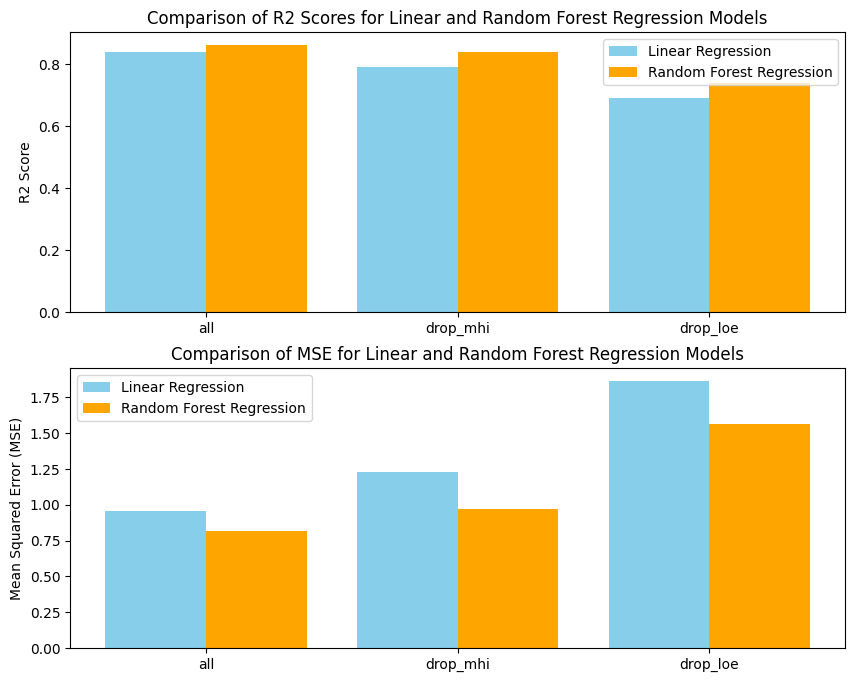

In [20]:
r2_scores_linear = [0.84, 0.79, 0.69]
mse_linear = [0.96, 1.23, 1.86]

r2_scores_random = [0.86, 0.84, 0.74]
mse_random = [0.82, 0.97, 1.56]

x_axis = ['all', 'drop_mhi', 'drop_loe']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting R2 scores
ax1.bar(np.arange(len(x_axis))-0.2, r2_scores_linear, width=0.4, label='Linear Regression', color='skyblue')
ax1.bar(np.arange(len(x_axis))+0.2, r2_scores_random, width=0.4, label='Random Forest Regression', color='orange')

ax1.set_xticks(np.arange(len(x_axis)))
ax1.set_xticklabels(x_axis)
ax1.set_ylabel('R2 Score')
ax1.set_title('Comparison of R2 Scores for Linear and Random Forest Regression Models')
ax1.legend()

# Plotting MSE
ax2.bar(np.arange(len(x_axis))-0.2, mse_linear, width=0.4, label='Linear Regression', color='skyblue')
ax2.bar(np.arange(len(x_axis))+0.2, mse_random, width=0.4, label='Random Forest Regression', color='orange')

ax2.set_xticks(np.arange(len(x_axis)))
ax2.set_xticklabels(x_axis)
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.set_title('Comparison of MSE for Linear and Random Forest Regression Models')
ax2.legend()

Observed Trends:

We consider 2 Machine learning models: 1. Linear Regression 2. Random Forest Regressor. We use only the demographic and economic features for the prediction. As we earlier explored that household income and level of education are highly correlated with eac other we also try to study the inmpact of using both these features or either one of these features for predictions. The experimental results are as follows


| Model                   | Features                   | R2 Score | Mean Squared Error (MSE) |
|-------------------------|----------------------------|----------|---------------------------|
| Linear Regression       | All features               | 0.84     | 0.96                      |
| Linear Regression       | Drop Median Household Income | 0.79   | 1.23                      |
| Linear Regression       | Drop Level of Education     | 0.69     | 1.86                      |
| Random Forest Regression | All features               | 0.86     | 0.82                      |
| Random Forest Regression | Drop Median Household Income | 0.84   | 0.97                      |
| Random Forest Regression | Drop Level of Education     | 0.74     | 1.56                      |


**Insights:**
1. **Model Performance:** Both Linear Regression and Random Forest Regression show promising performance, with R2 scores ranging from 0.69 to 0.86. These scores indicate a reasonably good fit of the models to the data.

2. **Feature Importance:** The models consistently perform well when using all features. However, dropping either the "Median Household Income" or "Level of Education" leads to a decrease in model performance. This suggests that both these features contribute significantly to predicting electric vehicle adoption.

3. **Correlation Impact:** The observed high correlation between household income and education level does not lead to multicollinearity issues affecting model performance. Including both features seems beneficial, emphasizing their independent impact on predicting EV adoption.

4. **Random Forest Advantage:** Random Forest Regression consistently outperforms Linear Regression across all scenarios. The ensemble nature of Random Forest allows it to capture complex relationships in the data, contributing to its superior predictive ability.

5. **Feature Drop Impact:** The drop in R2 scores and the increase in MSE when removing features indicate the importance of considering multiple demographic and economic factors for accurate predictions. A holistic approach considering various aspects yields better results than relying on a single feature.

6. **Feature Importance:** For both the models Linear Regression as well as Random Forest Regressor the Median Household Income and Level of Education are the Most importance features.

Final Thoughts:

Even though the number of EVs are increasing day by day the adoption rate for the EVs is still low. Some of the reasons tthat we think for this can be:

1. **High Initial Costs:** The upfront cost of electric vehicles, despite potential long-term savings on fuel, can be a deterrent for many consumers. California's diverse socio-economic landscape may include individuals who find it challenging to invest in more expensive electric cars compared to traditional gasoline vehicles.

2. **Range Anxiety:** Concerns about the driving range of electric vehicles, commonly known as range anxiety, can dissuade potential buyers. In a vast state like California, where long-distance travel is common, the fear of running out of battery power without easy access to charging stations could hinder adoption.

3. **Lack of Model Variety:** The availability of a limited variety of electric vehicle models may limit consumer choices. If there are fewer options that align with consumers' preferences, including size, style, or features, it could impede adoption rates.

4. **Inadequate Public Awareness:** Despite efforts to promote electric vehicles, there might still be a lack of awareness or understanding among the general public regarding the benefits of EVs. Educational campaigns highlighting cost savings, environmental advantages, and advancements in technology could contribute to increased adoption.